In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

# K-means

In this notebook, we will explore the k-means algorithm in its simplest form.
The data can be generated as in the previous notebook.

Text(0, 0.5, '$x_2$')

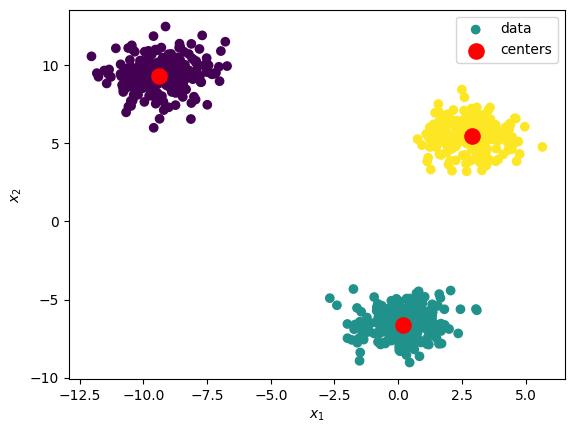

In [3]:
X,y,centers = make_blobs(
    n_samples=1000,
    n_features=2,
    return_centers=True,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Plot the training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.scatter(centers[:,0], centers[:,1], c='r', s=120)
plt.legend(["data", "centers"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

You can proceed in the same way as for KNN. However:
- In the constructor, we will save the number of clusters, as well as the maximum number of iterations and the tolerance.
- In the fit method, we will:
    - Initialize the centroids randomly from the data points
    - For each iteration:
        - Assign each data point to the nearest centroid
        - Update the centroids by taking the mean of the assigned points
        - Check for convergence by checking the decrease in loss (sum of squared distances to the nearest centroid)
- In the predict method, we will assign each data point to the nearest centroid.

Use, as presented in the lecture, matrix $\gamma$ to keep track of the assignments.

In [ ]:
class kmeans_demo:
    def __init__(self, K, max_iters=200, tol=1e-8):
        self.K = K
        self.max_iters = max_iters
        self.tol = tol
        indices = np.random.choice(X.shape[0], size=self.K, replace=False)
        self.cluster_centroids = X[indices]

    def fit(self,X):
        
        #expectation Step
        distances = cdist(X, self.cluster_centroids, metric='euclidean')  # shape: (n_test, n_train)
        gamma = np.argsort(distances, axis=1)[:, :1]
        def loss(X, cluster_centroids, clusters):
            L = 0
            for i in range(0, X.shape[0]):
                L += np.linalg.norm(X[i,:] - cluster_centroids[clusters[i]])
            return L
        
        iteration = 0
        while loss(X, self.cluster_centroids, gamma) > self.tol and iteration < self.max_iters: #Abbruchkriterien
            iteration += 1
            distances = cdist(X, self.cluster_centroids, metric='euclidean')  #Distanzmatrix
            gamma = np.argmin(distances, axis=1)
            new_centroids = np.array([X[gamma == k].mean(axis=0) if np.any(gamma == k) else self.cluster_centroids[k] for k in range(self.K)])
            self.cluster_centroids = new_centroids


    def predict(self, X):
        distances = cdist(X, self.cluster_centroids, metric='euclidean')  #Distanzmatrix
        gamma = np.argmin(distances, axis=1)
        print(self.cluster_centroids)
        return gamma
    
    def loss_value(self, X):
        def loss(X, cluster_centroids, clusters):
            L = 0
            for i in range(0, X.shape[0]):
                L += np.linalg.norm(X[i,:] - cluster_centroids[clusters[i]])
            return L
        distances = cdist(X, self.cluster_centroids, metric='euclidean')  #Distanzmatrix
        gamma = np.argmin(distances, axis=1)
        return loss(X, self.cluster_centroids, gamma)

Once this is done, we can instantiate the object and call its `fit` method on the data.

In [74]:
K_means = kmeans_demo(K = 3)
K_means.fit(X_train)
pred = K_means.predict(X_test)
loss = K_means.loss_value(X_test)
print(loss)

[[-8.69620591 10.11966702]
 [-9.77954274  8.76993057]
 [ 1.4777231  -0.655218  ]]
1363.43877990854


The obtained solution is **not** the unique solution of the problem. The optimization procedure converges to a __local minimum__. As such, it is sensitive to initial conditions

<details>
    <summary>What influences the final result?</summary>
    The choice of initial values of `C` is the *only* random parameter that we initialize
</details>

<details>
    <summary>What can be done about it?</summary>
    We could start from different random positions! Then, select the best model out of those we obtained.
</details>


Create a class that applies k-means several times, and saves the best model (the one with the lowest loss).

In [63]:
class kmeans_demo_multiple:
    def __init__(self, K, repeats=10, max_iters=200, tol=1e-8):
        self.K = K
        self.repeats = repeats
        self.max_iters=max_iters
        self.tol=tol
        self.error = []

    def best_model(self, X):
        for i in range(self.repeats):
            K_means = kmeans_demo(K = self.K)
            K_means.fit(X)
            K_means.predict(X)
            loss = K_means.loss_value(X)
            self.error.append(loss)
        self.error = min(self.error)
            

In [64]:
# Instantiate and fit the model

## How to know which $K$ to use?

So far, we assumed that we have a reasonable intuition for `K`. But it may not be the case.
Let us create a new example, with more centroids, and this time plot it without the labels. See if you can guess the true number of centroids (which is 5).

Tip: run the following cell several time, as it will produce always a different result

Text(0, 0.5, '$x_2$')

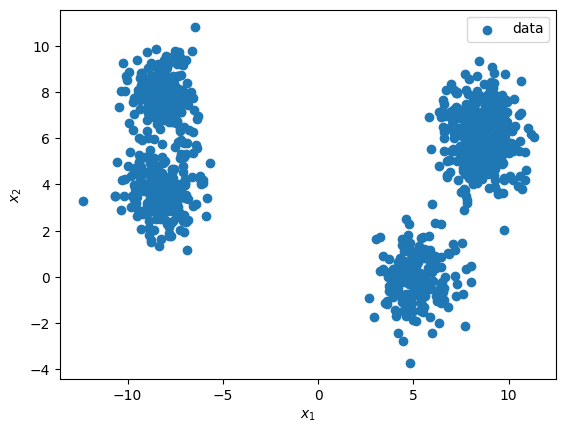

In [65]:
X2,y2 = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=5
)
plt.scatter(X2[:,0], X2[:,1])
plt.legend(["data"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

In those cases, we can proceed in the following way:

- select a set of possible values for `K`
- fit k-means with each of them and keep track of the error
- plot the error for each `K`

[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[ 7.42481284  3.99466142]
 [-8.1965835   5.74615226]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.1965835   5.74615226]
 [ 7.42481284  3.99466142]]
[[-8.19658

Text(0, 0.5, 'Error')

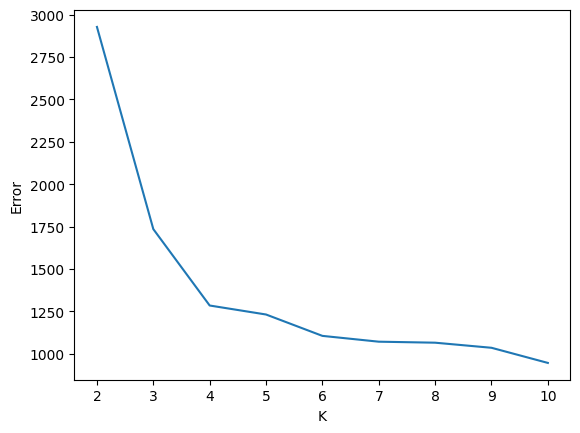

In [66]:
Ks = [2,3,4,5,6,7,8,9,10]
errors = []

for k in Ks:
    m = kmeans_demo_multiple(K=k, repeats=20)
    m.best_model(X2)
    errors.append(m.error)

plt.plot(Ks, errors)
plt.xlabel("K")
plt.ylabel("Error")

In most cases, it is possible to empirically observe how after a certain value of `K`, further increases lead to marginal decrease in the error

<details>
<summary>What is the maximal value for K?</summary>
The maximal value for K is the number of data points.
</details>

<details>
<summary>Why? What happens at the maximal value for K?</summary>
If K is equal to the number of data points, there exist one centroid for each data point. Any additional centroid would never receive any affiliation because of that.
</details>

<details>
<summary>What about the error?</summary>
If K is equal to the number of data points, the error is 0, because each centroid is overlapping with its respective data point, and therefore there is no error</details>